Assignment3: Mini Project

Group name: TheMania

Group member: Aasta Tsai, Aoun Khan, Carlin Boyles, Linh Le

Date: 2024-04-08

Project topic: Unemployment rate, participation rate, and employment rate by type of student during school months, monthly, unadjusted for seasonality

In [40]:
# Import Modules
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

In [41]:
# Get dataset
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(data.shape)
data.head(10)

(374, 13)


Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   
6                 6                       40             7        Obese   
7                 7                       75             6       Normal   
8                 7                       75             6       Normal   
9                 7                       75             6       Normal   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea  
5         140/90          85         3000       Insomnia  
6         140/90          82         3500       Insomnia  
7         120/80          70         8000            NaN  
8         120/80          70         8000            NaN  
9         120/80          70         8000            NaN

## Data Preprocessing

In [42]:
# Check for rows with missing values
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [43]:
# Fix missing values
data = data.replace(pd.NA, 'None')

# Check for duplicates
data.duplicated().sum()

0

In [44]:
# Drop irrelevant column "Person ID"
data = data.drop(columns=["Person ID"])

In [45]:
# Analyze values in each column
for col in data.columns:
    print(col, data[col].unique(), sep='\n')
    print()

Gender
['Male' 'Female']

Age
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]

Occupation
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Sleep Duration
[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]

Quality of Sleep
[6 4 7 5 8 9]

Physical Activity Level
[42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]

Stress Level
[6 8 7 4 3 5]

BMI Category
['Overweight' 'Normal' 'Obese' 'Normal Weight']

Blood Pressure
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']

Heart Rate
[77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]

Daily Steps
[ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500

In [46]:
# Get aggregate statistics for all columns
data.describe()

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%        4.000000   68.000000   5600.000000  
50%        5.000000   70.000000   7000.000000  
75%        7.000000   72.000000   8000.000000  
max        8.000000   86.000000  10000.000000

In [47]:
# Get all numerical/categorical columns
numerical = []
categorical = []
for col in data.columns:

    # Only analyze numerical, non-binary columns
    if (data[col].dtype == 'int64' or data[col].dtype == 'float64') and len(data[col].unique()) > 2:
        numerical.append(col)
    else:
        categorical.append(col)
print("Number of numerical columns:", len(numerical))
print(numerical)
print("Number of categorical columns:", len(categorical))
print(categorical)

Number of numerical columns: 7
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Number of categorical columns: 5
['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [48]:
# Check for outliers in all numerical columns
outlier_dict = {}
for col in numerical:

    # Calculate IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate fences
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)

    # Check if an outlier exists
    if data[col].min() < lower_fence or data[col].max() > upper_fence:

        # If an outlier is present in the column, find all
        outliers = []
        for val in data[col]:
            if val < lower_fence or val > upper_fence:
                outliers.append(val)

        # Store outliers
        outlier_dict[col] = outliers

        # Print findings
        print(col, 'has', len(outliers), 'outlier(s):')
        print(*outliers)
        print()

Heart Rate has 15 outlier(s):
85 85 85 82 80 80 81 81 84 84 80 83 83 86 86



In [49]:
# Copy data to modify
mod_data = data.copy()

# Create storage for value mapping
value_mappings = {}

# Convert categorical columns to numerical
for col in categorical:

    # Get all possible values in column
    values = sorted(list(data[col].unique()))

    # Make dictionary for values
    value_dict = {values[i]:i for i in range(len(values))}

    # Store value mappings
    value_mappings[col] = value_dict

    # Display column name and value mapping
    print(col, value_dict)

    # Apply conversion to column
    mod_data[col] = data[col].apply(lambda val : value_dict[val])

# Display converted dataframe
mod_data.head()

Gender {'Female': 0, 'Male': 1}
Occupation {'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}
BMI Category {'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}
Blood Pressure {'115/75': 0, '115/78': 1, '117/76': 2, '118/75': 3, '118/76': 4, '119/77': 5, '120/80': 6, '121/79': 7, '122/80': 8, '125/80': 9, '125/82': 10, '126/83': 11, '128/84': 12, '128/85': 13, '129/84': 14, '130/85': 15, '130/86': 16, '131/86': 17, '132/87': 18, '135/88': 19, '135/90': 20, '139/91': 21, '140/90': 22, '140/95': 23, '142/92': 24}
Sleep Disorder {'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}


Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             3              11   
1                       60             8             0               9   
2                       60             8             0               9   
3                       30             8             2              22   
4                       30             8             2              22   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               1  
1          75        10000               1  
2          75        10000               1  
3          85         3000               2  
4          85         3000               2

In [50]:
# Copy data to modify
mod_data_one_hot = data.copy()

# Perform One-hot encoding
for col in categorical:
    mod_data_one_hot = pd.concat([mod_data_one_hot, pd.get_dummies(mod_data_one_hot[col])], axis=1)

# Drop old categorical columns
mod_data_one_hot = mod_data_one_hot.drop(columns=categorical)
mod_data_one_hot

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0     27             6.1                 6                       42   
1     28             6.2                 6                       60   
2     28             6.2                 6                       60   
3     28             5.9                 4                       30   
4     28             5.9                 4                       30   
..   ...             ...               ...                      ...   
369   59             8.1                 9                       75   
370   59             8.0                 9                       75   
371   59             8.1                 9                       75   
372   59             8.1                 9                       75   
373   59             8.1                 9                       75   

     Stress Level  Heart Rate  Daily Steps  Female   Male  Accountant  ...  \
0               6          77         4200   False   True       False  ...   
1               8          75        10000   False   True       False  ...   
2               8          75        10000   False   True       False  ...   
3               8          85         3000   False   True       False  ...   
4               8          85         3000   False   True       False  ...   
..            ...         ...          ...     ...    ...         ...  ...   
369             3          68         7000    True  False       False  ...   
370             3          68         7000    True  False       False  ...   
371             3          68         7000    True  False       False  ...   
372             3          68         7000    True  False       False  ...   
373             3          68         7000    True  False       False  ...   

     132/87  135/88  135/90  139/91  140/90  140/95  142/92  Insomnia   None  \
0     False   False   False   False   False   False   False     False   True   
1     False   False   False   False   False   False   False     False   True   
2     False   False   False   False   False   False   False     False   True   
3     False   False   False   False    True   False   False     False  False   
4     False   False   False   False    True   False   False     False  False   
..      ...     ...     ...     ...     ...     ...     ...       ...    ...   
369   False   False   False   False   False    True   False     False  False   
370   False   False   False   False   False    True   False     False  False   
371   False   False   False   False   False    True   False     False  False   
372   False   False   False   False   False    True   False     False  False   
373   False   False   False   False   False    True   False     False  False   

     Sleep Apnea  
0          False  
1          False  
2          False  
3           True  
4           True  
..           ...  
369         True  
370         True  
371         True  
372         True  
373         True  

[374 rows x 52 columns]

## Exploratory Data Analysis

In [51]:
# Check correlations
correlation_matrix = mod_data.corr()
correlation_matrix

Gender       Age  Occupation  Sleep Duration  \
Gender                   1.000000 -0.596358   -0.219113       -0.121579   
Age                     -0.596358  1.000000    0.231188        0.344709   
Occupation              -0.219113  0.231188    1.000000       -0.325775   
Sleep Duration          -0.121579  0.344709   -0.325775        1.000000   
Quality of Sleep        -0.291366  0.473734   -0.278071        0.883213   
Physical Activity Level  0.001454  0.178993   -0.103660        0.212360   
Stress Level             0.396018 -0.422344    0.021123       -0.811023   
BMI Category            -0.352060  0.511329    0.699504       -0.376358   
Blood Pressure          -0.176272  0.572813    0.546791       -0.191704   
Heart Rate               0.217105 -0.225606    0.043928       -0.516455   
Daily Steps             -0.014509  0.057973   -0.105877       -0.039533   
Sleep Disorder          -0.253415  0.232000   -0.169800        0.177552   

                         Quality of Sleep  Physical Activity Level  \
Gender                          -0.291366                 0.001454   
Age                              0.473734                 0.178993   
Occupation                      -0.278071                -0.103660   
Sleep Duration                   0.883213                 0.212360   
Quality of Sleep                 1.000000                 0.192896   
Physical Activity Level          0.192896                 1.000000   
Stress Level                    -0.898752                -0.034134   
BMI Category                    -0.312562                 0.077156   
Blood Pressure                  -0.147769                 0.271913   
Heart Rate                      -0.659865                 0.136971   
Daily Steps                      0.016791                 0.772723   
Sleep Disorder                   0.179592                 0.433214   

                         Stress Level  BMI Category  Blood Pressure  \
Gender                       0.396018     -0.352060       -0.176272   
Age                         -0.422344      0.511329        0.572813   
Occupation                   0.021123      0.699504        0.546791   
Sleep Duration              -0.811023     -0.376358       -0.191704   
Quality of Sleep            -0.898752     -0.312562       -0.147769   
Physical Activity Level     -0.034134      0.077156        0.271913   
Stress Level                 1.000000      0.163895        0.117545   
BMI Category                 0.163895      1.000000        0.724217   
Blood Pressure               0.117545      0.724217        1.000000   
Heart Rate                   0.670026      0.295585        0.288300   
Daily Steps                  0.186829     -0.005059        0.119455   
Sleep Disorder              -0.036058      0.016573        0.197906   

                         Heart Rate  Daily Steps  Sleep Disorder  
Gender                     0.217105    -0.014509       -0.253415  
Age                       -0.225606     0.057973        0.232000  
Occupation                 0.043928    -0.105877       -0.169800  
Sleep Duration            -0.516455    -0.039533        0.177552  
Quality of Sleep          -0.659865     0.016791        0.179592  
Physical Activity Level    0.136971     0.772723        0.433214  
Stress Level               0.670026     0.186829       -0.036058  
BMI Category               0.295585    -0.005059        0.016573  
Blood Pressure             0.288300     0.119455        0.197906  
Heart Rate                 1.000000    -0.030309        0.205987  
Daily Steps               -0.030309     1.000000        0.342098  
Sleep Disorder             0.205987     0.342098        1.000000

In [52]:
# Check correlations of one-hot encoding
mod_data_one_hot.corr().loc["Quality of Sleep"].sort_values()

Stress Level              -0.898752
Heart Rate                -0.659865
Salesperson               -0.335950
Insomnia                  -0.332406
Male                      -0.291366
Overweight                -0.280398
Doctor                    -0.269276
140/90                    -0.244668
131/86                    -0.203211
Sales Representative      -0.203211
Scientist                 -0.201176
132/87                    -0.173989
129/84                    -0.141870
130/86                    -0.141870
Obese                     -0.126574
Teacher                   -0.097806
120/80                    -0.089914
126/83                    -0.080530
128/85                    -0.073685
135/90                    -0.073002
Software Engineer         -0.070702
Sleep Apnea               -0.046254
130/85                    -0.035342
125/82                    -0.027211
128/84                    -0.019189
117/76                    -0.019189
135/88                    -0.019189
142/92                    -0

<Axes: >

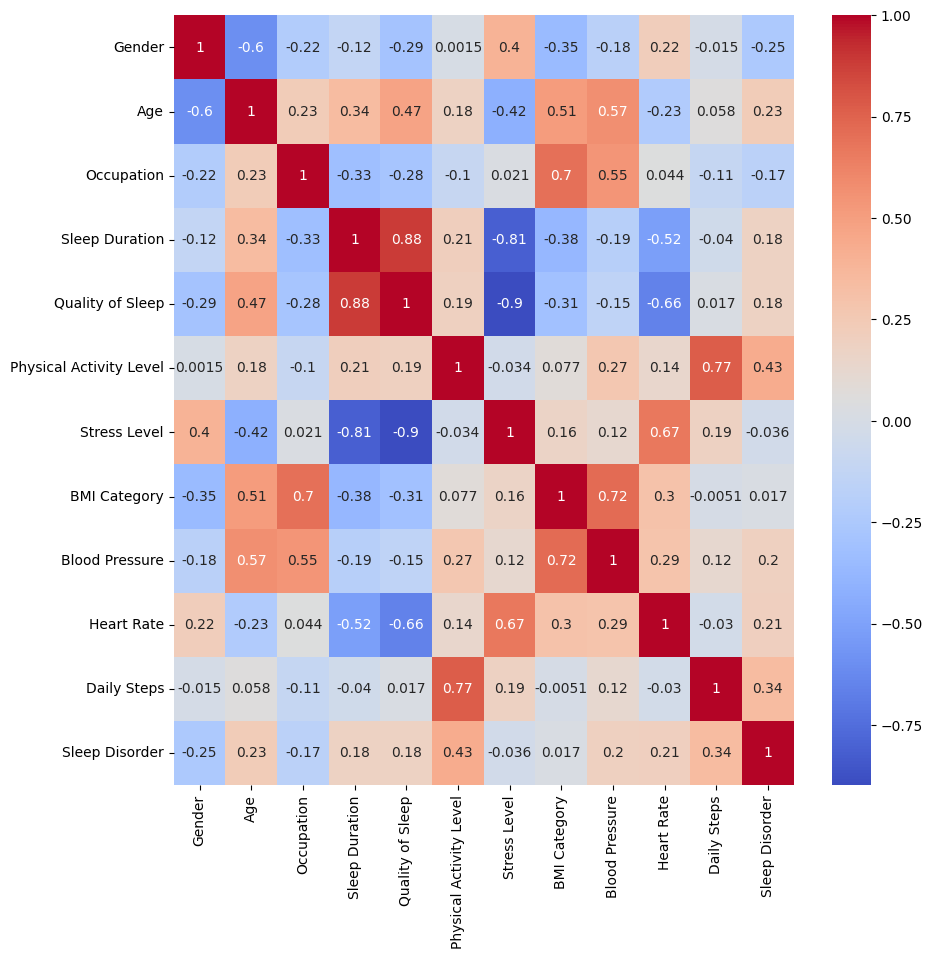

In [53]:
# Generate correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

array([[<Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Occupation', ylabel='Gender'>,
        <Axes: xlabel='Sleep Duration', ylabel='Gender'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Gender'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Gender'>,
        <Axes: xlabel='Stress Level', ylabel='Gender'>,
        <Axes: xlabel='BMI Category', ylabel='Gender'>,
        <Axes: xlabel='Blood Pressure', ylabel='Gender'>,
        <Axes: xlabel='Heart Rate', ylabel='Gender'>,
        <Axes: xlabel='Daily Steps', ylabel='Gender'>,
        <Axes: xlabel='Sleep Disorder', ylabel='Gender'>],
       [<Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Occupation', ylabel='Age'>,
        <Axes: xlabel='Sleep Duration', ylabel='Age'>,
        <Axes: xlabel='Quality of Sleep', ylabel='Age'>,
        <Axes: xlabel='Physical Activity Level', ylabel='Age'>,
        

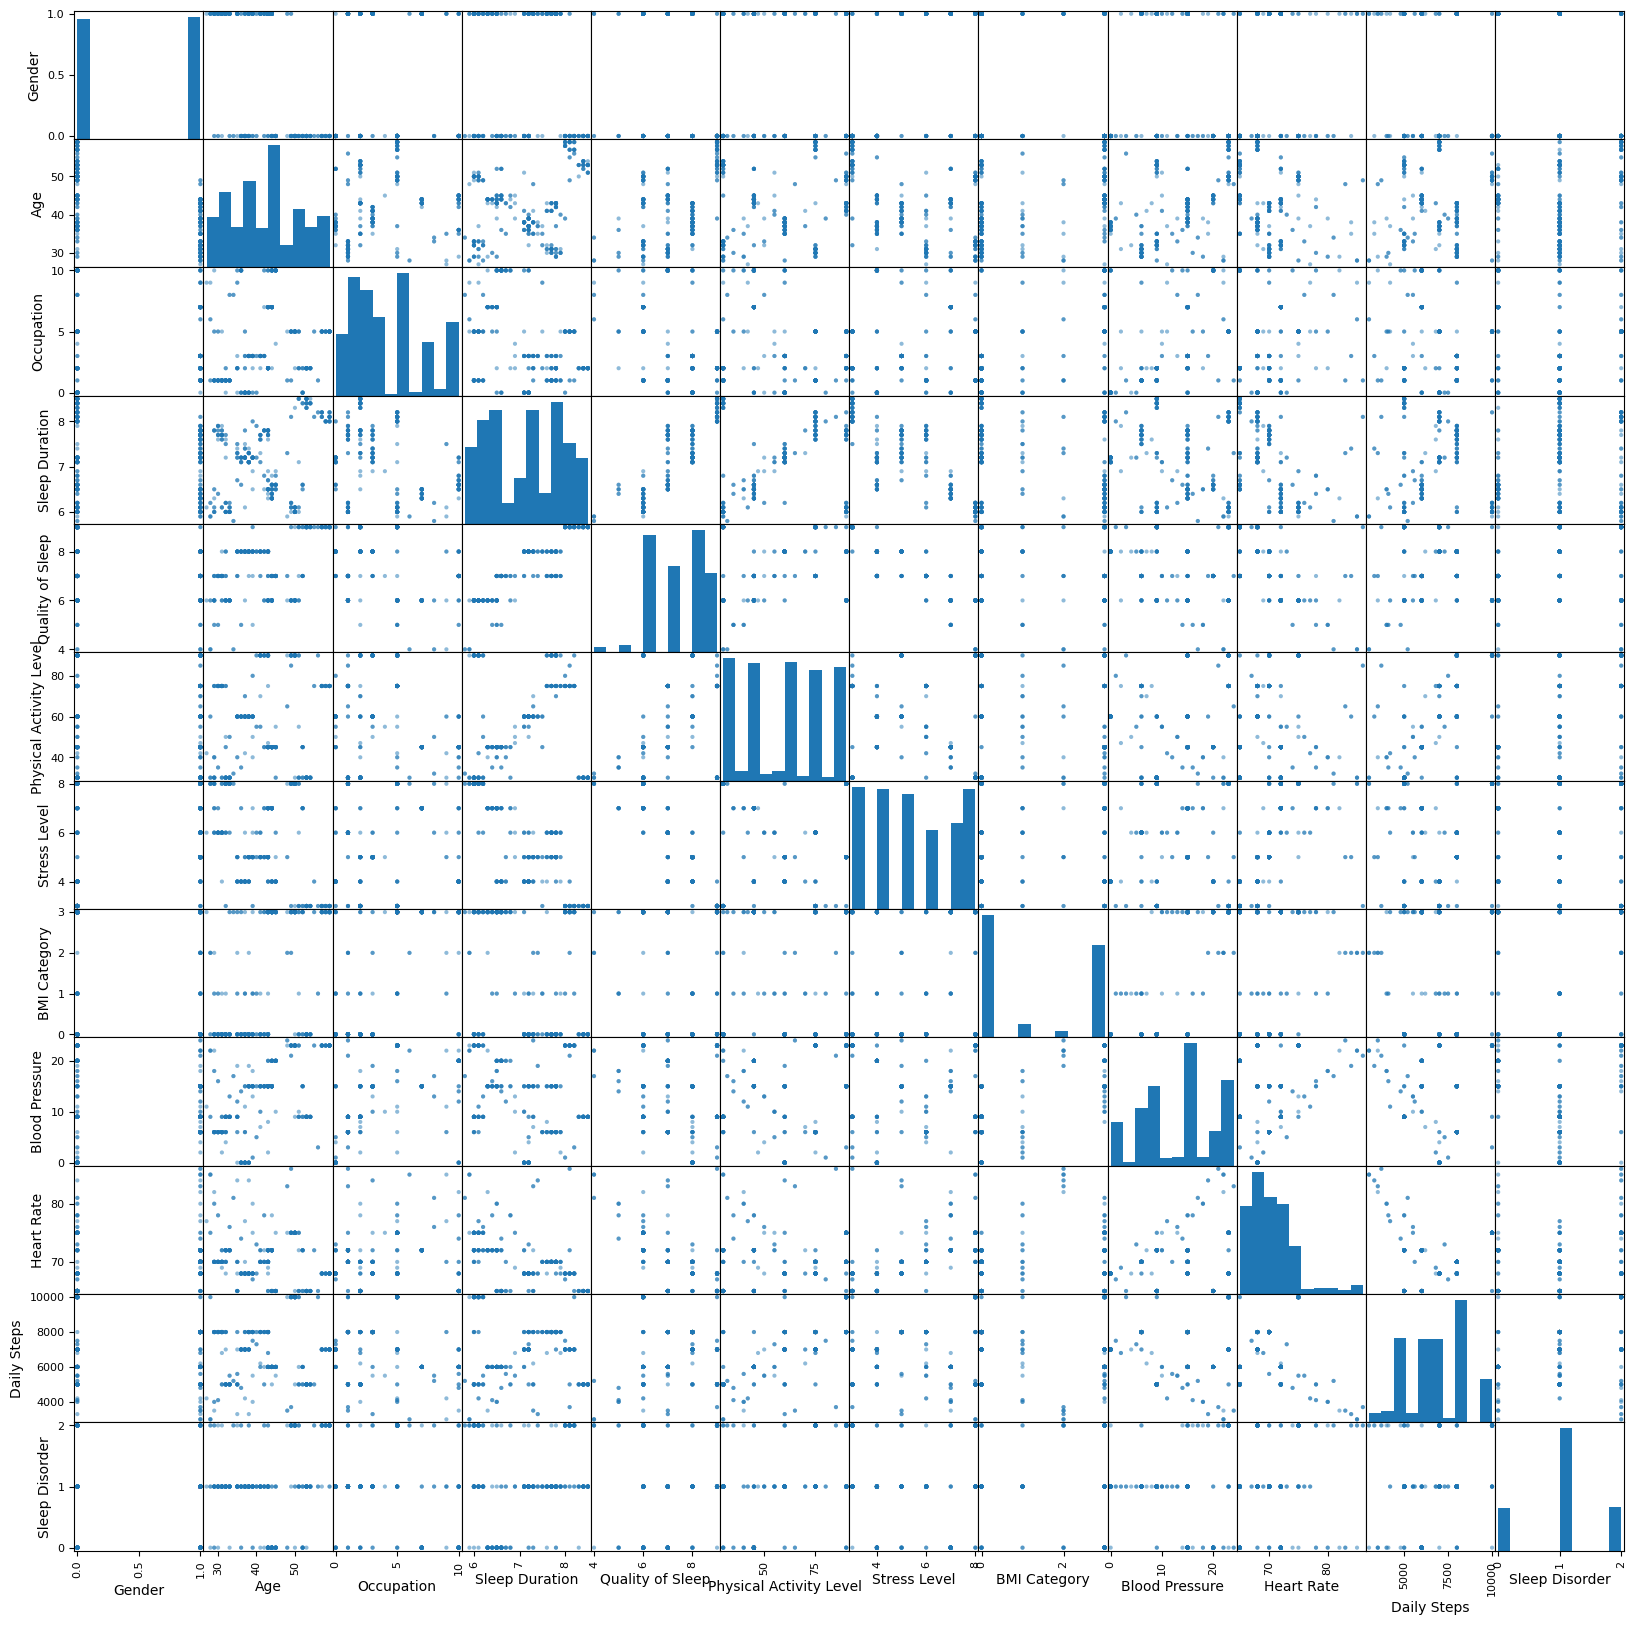

In [54]:
# Generate scatter matrix
pd.plotting.scatter_matrix(mod_data, figsize=(20,20))

## Problem Formulation

Explanatory variables: Sleep duration, Stress level, Heart rate, Age

Responding variables: Sleep Quality

## Modeling
Idea: make a model for every possible combination of explanatory variables

Model 0: Sleep Duration\
Model 1: Stress Level\
Model 2: Heart Rate\
Model 3: Age\
Model 4: Sleep Duration, Stress Level\
Model 5: Sleep Duration, Heart Rate\
Model 6: Sleep Duration, Age\
Model 7: Stress Level, Heart Rate\
Model 8: Stress Level, Age\
Model 9: Heart Rate, Age\
Model 10: Sleep Duration, Stress Level, Heart Rate\
Model 11: Sleep Duration, Stress Level, Age\
Model 12: Sleep Duration, Heart Rate, Age\
Model 13: Stress Level, Heart Rate, Age\
Model 14: Sleep Duration, Stress Level, Heart Rate, Age

In [55]:
# Set variables for each models
model_vars = [
    ['Sleep Duration'], # Model 0
    ['Stress Level'], # Model 1
    ['Heart Rate'], # Model 2
    ['Age'], # Model 3
    ['Sleep Duration', 'Stress Level'], # Model 4
    ['Sleep Duration', 'Heart Rate'], # Model 5
    ['Sleep Duration', 'Age'], # Model 6
    ['Stress Level', 'Heart Rate'], # Model 7
    ['Stress Level', 'Age'], # Model 8
    ['Heart Rate', 'Age'], # Model 9
    ['Sleep Duration', 'Stress Level', 'Heart Rate'], # Model 10
    ['Sleep Duration', 'Stress Level', 'Age'], # Model 11
    ['Sleep Duration', 'Heart Rate', 'Age'], # Model 12
    ['Stress Level', 'Heart Rate', 'Age'], # Model 13
    ['Sleep Duration', 'Stress Level', 'Heart Rate', 'Age'] # Model 14
]


In [56]:
# Separate data by explanatory and response variables
explanatory = data[['Sleep Duration', 'Stress Level', 'Heart Rate', 'Age']]
response = data['Quality of Sleep']

## Model Evaluation

In [57]:
# Make models (adapted from https://scikit-learn.org/stable/modules/cross_validation.html)
models = []
model_scores = pd.DataFrame(columns=["Model", "Training_Accuracy", "Training_F1", "Testing_Accuracy", "Testing_F1"])
folds = 5
for i in range(len(model_vars)):
    var_list = model_vars[i]

    # Get columns
    x = explanatory[var_list]
    y = response

    # Perfrom 5-fold cross validation
    k_folds = KFold(n_splits=folds, random_state=42, shuffle=True)
    models_for_var = []
    for train_indexes, test_indexes in k_folds.split(x):

        # Split data from fold
        x_train = x.iloc[train_indexes]
        y_train = y.iloc[train_indexes]
        x_test = x.iloc[test_indexes]
        y_test = y.iloc[test_indexes]

        # Train model
        model = LogisticRegression(max_iter=10000)
        models_for_var.append(model)
        model.fit(x_train, y_train)

        # Get training mean accuracy, precision, and recall scores
        training_accuracy = model.score(x_train, y_train)
        y_pred = model.predict(x_train)
        training_f1 = f1_score(y_train, y_pred, average="weighted")

        # Get testing mean accuracy, precision, and recall scores
        testing_accuracy = model.score(x_test, y_test)
        y_pred = model.predict(x_test)
        testing_f1 = f1_score(y_test, y_pred, average="weighted")

        # Store scores
        model_scores.loc[len(model_scores)] = [i, training_accuracy, training_f1, testing_accuracy, testing_f1]

    # Store models
    models.append(models_for_var)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [58]:
model_scores

Model  Training_Accuracy  Training_F1  Testing_Accuracy  Testing_F1
0     0.0           0.775920     0.705263          0.773333    0.700770
1     0.0           0.782609     0.718471          0.773333    0.699700
2     0.0           0.779264     0.711814          0.786667    0.727294
3     0.0           0.762542     0.688730          0.786667    0.721897
4     0.0           0.763333     0.669750          0.716216    0.606569
..    ...                ...          ...               ...         ...
70   14.0           0.872910     0.866893          0.893333    0.898095
71   14.0           0.862876     0.857774          0.813333    0.796974
72   14.0           0.872910     0.867837          0.880000    0.866300
73   14.0           0.859532     0.849820          0.826667    0.803140
74   14.0           0.856667     0.844454          0.797297    0.775502

[75 rows x 5 columns]

In [59]:
# Make scatter plot of scores
plot_acc = px.scatter(model_scores, x='Training_Accuracy', y='Testing_Accuracy', width=500, color='Model', title="Training vs. Testing Accuracy per Model")
plot_f1 = px.scatter(model_scores, x='Training_F1', y='Testing_F1', width=500, color='Model', title="Training vs. Testing F1 Score per Model")

# Make y = x line
line_range = np.array([0, 1])

# Hide legend/add line to each plot and show
for plot in [plot_acc, plot_f1]:
    plot.update_layout(showlegend=False)
    plot.add_scatter(x=line_range, y=line_range, mode='lines')
    plot.show()

In [60]:
# Calculate mean scores
mean_model_scores = model_scores.groupby('Model').mean().reset_index()

# Make scatter plot of scores
plot_acc = px.scatter(mean_model_scores, x='Training_Accuracy', y='Testing_Accuracy', width=500, color='Model', title="Mean Training vs. Mean Testing Accuracy per Model")
plot_f1 = px.scatter(mean_model_scores, x='Training_F1', y='Testing_F1', width=500, color='Model', title="Mean Training vs. Mean Testing F1 Score per Model")

# Make y = x line
line_range = np.array([0, 1])

# Hide legend/add line to each plot and show
for plot in [plot_acc, plot_f1]:
    plot.update_layout(showlegend=False)
    plot.add_scatter(x=line_range, y=line_range, mode='lines')
    plot.show()

In [61]:
# Get top 5 training accuracies
mean_model_scores.sort_values("Training_Accuracy", ascending=False)[["Model", "Training_Accuracy"]].reset_index(drop=True).head()

Model  Training_Accuracy
0   14.0           0.864979
1   10.0           0.858290
2   13.0           0.852263
3    7.0           0.839561
4   11.0           0.838901

In [62]:
# Get top 5 testing accuracies
mean_model_scores.sort_values("Testing_Accuracy", ascending=False)[["Model", "Testing_Accuracy"]].reset_index(drop=True).head()

Model  Testing_Accuracy
0   13.0          0.844721
1   14.0          0.842126
2    7.0          0.839351
3   11.0          0.834126
4   10.0          0.831423

In [63]:
# Get top 5 training F1 scores
mean_model_scores.sort_values("Training_F1", ascending=False)[["Model", "Training_F1"]].reset_index(drop=True).head()

Model  Training_F1
0   14.0     0.857355
1   10.0     0.849582
2   13.0     0.840244
3    7.0     0.823973
4   11.0     0.817293

In [64]:
# Get top 5 testing F1 scores
mean_model_scores.sort_values("Testing_F1", ascending=False)[["Model", "Testing_F1"]].reset_index(drop=True).head().round(3)

Model  Testing_F1
0   13.0       0.831
1   14.0       0.828
2    7.0       0.821
3   10.0       0.815
4   11.0       0.809

In [69]:
# Finding coefficients of intercept of best model (i.e., Model 14)

best_model = models[14][2]
coefficients = best_model.coef_[0]
intercept = best_model.intercept_[0]

# Write to report
print("Best Model Coefficients: {}\n".format(coefficients))
print("Best Model Intercept: {}\n".format(intercept))

Best Model Coefficients: [-1.18377935  1.95689473  0.75081096 -0.13535382]

Best Model Intercept: -57.89470832600968

